<a href="https://colab.research.google.com/github/chandini2595/FireSense/blob/main/Fractal%20Clustering/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/combined_firedata.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FIRE_NAME,CAUSE,lat,long,GIS_ACRES
0,2008-07,Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,34.079570,0.010000,13.164516,no_fire,0.0,34.54,-120.04,0.000000
1,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,SERPENTINE,1.0,38.18,-120.56,176.763400
2,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,POOL 2 - MAIN,10.0,38.18,-120.56,73.444778
3,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,FRENCH,14.0,38.18,-120.56,101.074150
4,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,EVANS,6.0,38.18,-120.56,103.968050


#Check Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values
missing_values

,0
date,0
county,0
maxtempF,0
mintempF,0
avgtempF,0
totalSnow,0
humid,0
wind,0
precip,0
q_avgtempF,0


# Resampling the data

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Select only numeric columns for resampling
numeric_columns = df.select_dtypes(include=['number'])

# Resample data by month and calculate the mean for numerical features
monthly_data = df[['date']].join(numeric_columns).set_index('date').resample('ME').mean()

# Display the first few rows of resampled data
monthly_data.head()

,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,CAUSE,lat,long,GIS_ACRES
date,,,,,,,,,,,,,,,
2008-07-31,87.468093,56.858696,79.142707,0.000000,41.712833,6.431627,0.001017,46.057574,66.722528,0.410140,13.634362,2.815217,38.157174,-121.259022,1378.975315
2008-08-31,89.407585,59.059285,80.005667,0.000000,40.790323,6.038797,0.003008,51.712632,60.641261,0.370905,11.624804,3.054054,37.522973,-120.475946,165.363642
2008-09-30,85.884507,55.772300,75.432394,0.000000,38.584977,5.367606,0.001972,58.661999,56.335062,0.388623,11.585728,2.774648,37.789296,-120.708451,375.585916
2008-10-31,75.043011,50.682028,65.816692,0.010442,40.330773,6.237071,0.032463,65.512042,60.041737,0.300258,10.826370,2.984127,37.602857,-120.577460,337.171566
2008-11-30,64.708333,45.283333,56.081667,0.053303,61.006667,5.689444,0.116278,67.729820,58.186012,0.282355,8.482444,1.150000,37.736667,-120.702333,727.323422


#Exploratory Data Analysis (EDA)

In [ ]:
# Display summary statistics of climate-related features
climate_features = ['avgtempF', 'humid', 'wind', 'precip', 'sunHour']
df[climate_features].describe()

,avgtempF,humid,wind,precip,sunHour
count,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000
mean,64.676692,54.408352,5.583294,0.072370,11.292206
std,14.635490,16.926551,1.514516,0.133537,2.113807
min,19.483871,10.466667,2.354839,0.000000,4.800000
25%,53.870968,41.165323,4.533333,0.003226,9.796774
50%,65.290323,54.098387,5.354839,0.020000,11.423333
75%,75.900806,67.903226,6.354839,0.080645,13.274194
max,102.612903,95.935484,14.129032,1.748387,14.500000


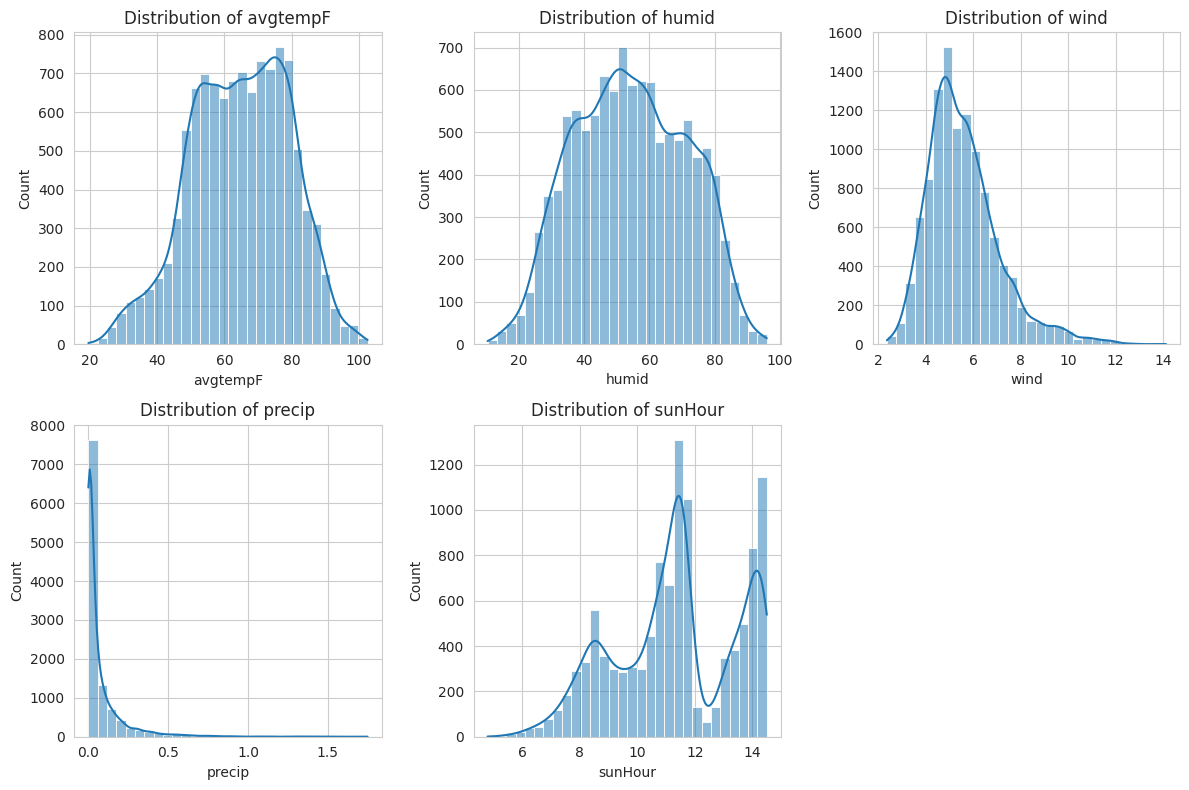

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create histograms for climate features
climate_features = ['avgtempF', 'humid', 'wind', 'precip', 'sunHour']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(climate_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# •	Hotter areas with high temperature & sunshine hours → More wildfire-prone.
#	•	Low humidity regions → Increased fire risk due to dryness.
#	•	Low precipitation areas → Drier fuel, making ignition more likely.
#	•	High wind regions → Fire spread risk increases.

#Correlation Analysis

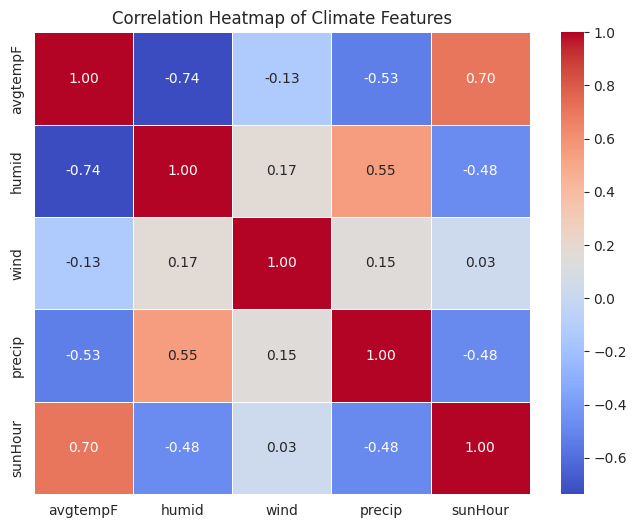

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[['avgtempF', 'humid', 'wind', 'precip', 'sunHour']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Features")
plt.show()


	•	High temperature + Low humidity + High sunHour = High wildfire risk.
	•	Low precipitation also increases fire risk, as drier conditions mean more flammable vegetation.
	•	Wind is independent but could be a major factor in wildfire spread.

# Temperature & Precipitation Trends

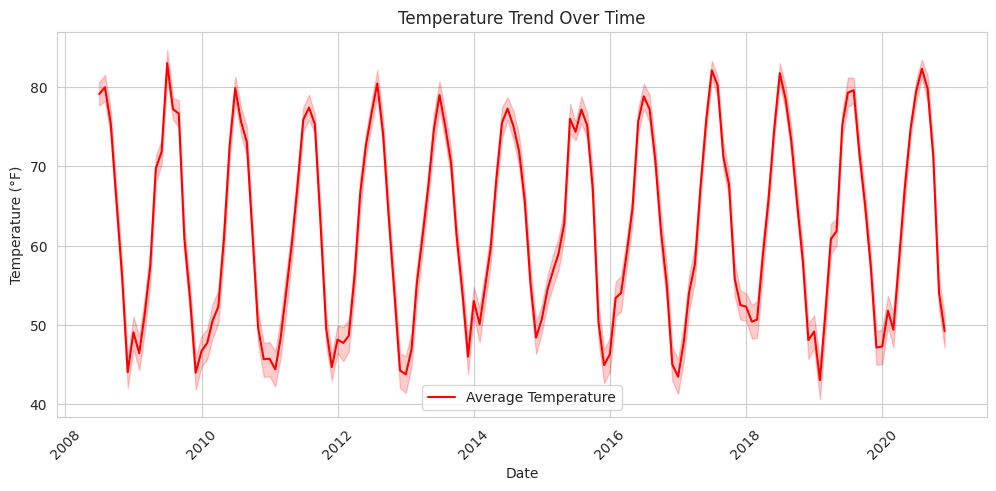

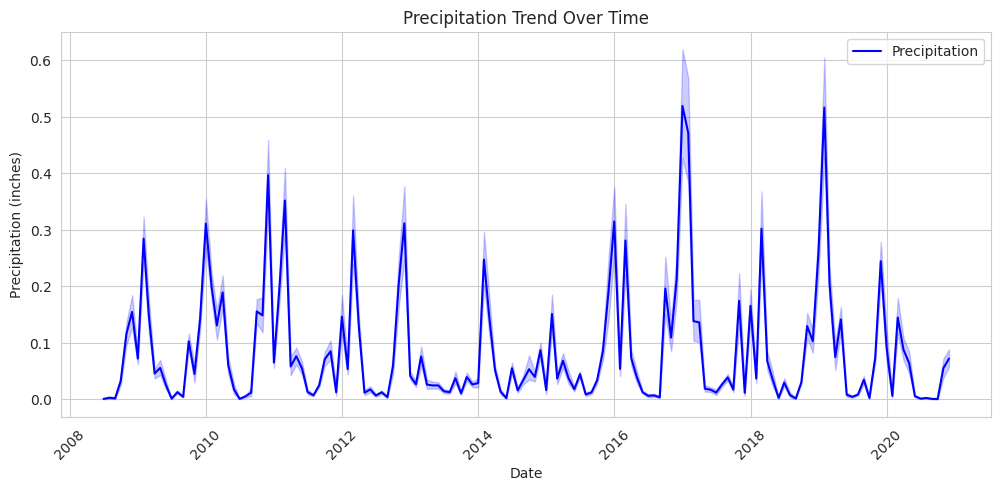

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Temperature Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['date'], y=df['avgtempF'], label='Average Temperature', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()

# Plot Precipitation Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['date'], y=df['precip'], label='Precipitation', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Trend Over Time')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select numerical features for clustering
features = ["avgtempF", "humid", "wind", "precip", "sunHour", "lat", "long", "GIS_ACRES"]
df_cluster = df[features]

# Standardize the dataset (important for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply initial K-means clustering
k = 5  # Initial number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

# Compute SSE (Sum of Squared Errors)
sse = kmeans.inertia_

# Compute Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df["cluster"])

# Display clustering results in Colab
from IPython.display import display
display(df[["county", "lat", "long", "GIS_ACRES", "cluster"]])

# Output SSE and Silhouette Score
sse, silhouette_avg


,county,lat,long,GIS_ACRES,cluster
0,Santa Barbara County,34.54,-120.04,0.000000,4
1,Calaveras County,38.18,-120.56,176.763400,0
2,Calaveras County,38.18,-120.56,73.444778,0
3,Calaveras County,38.18,-120.56,101.074150,0
4,Calaveras County,38.18,-120.56,103.968050,0
...,...,...,...,...,...
10983,San Mateo County,37.41,-122.37,0.000000,2
10984,Siskiyou County,41.59,-122.53,0.000000,2
10985,Santa Cruz County,37.01,-122.01,0.000000,2
10986,Glenn County,39.60,-122.40,0.000000,2


(41496.12777261959, 0.2369370773839912)

In [ ]:
# Reload necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Load the dataset
file_path = "/content/combined_firedata.csv"
df = pd.read_csv(file_path)

# Select numerical features for clustering
features = ["avgtempF", "humid", "wind", "precip", "sunHour", "lat", "long", "GIS_ACRES"]
df_cluster = df[features]

# Standardize the dataset (important for K-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Define the number of initial clusters
k = 5

# Apply initial K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

# Compute SSE and Silhouette Score for the first iteration
sse_values = [kmeans.inertia_]
silhouette_scores = [silhouette_score(df_scaled, df["cluster"])]

# Function to evaluate compactness (variance within a cluster)
def cluster_compactness(cluster_data):
    return np.mean(np.var(cluster_data, axis=0))

# Function to evaluate separation (distance between cluster centers)
def cluster_separation(cluster_centers):
    distances = []
    for i in range(len(cluster_centers)):
        for j in range(i + 1, len(cluster_centers)):
            distances.append(np.linalg.norm(cluster_centers[i] - cluster_centers[j]))
    return np.mean(distances)

# Iterative fractal clustering process (3 iterations)
for iteration in range(2):  # We already did one clustering, so do two more
    new_clusters = []
    for cluster_id in range(k):
        # Extract cluster data
        cluster_data = df_scaled[df["cluster"] == cluster_id]

        # Compute compactness score
        compactness_score = cluster_compactness(cluster_data)

        # If the cluster is too spread out, apply sub-clustering
        if compactness_score > np.percentile(sse_values, 75):  # Threshold based on SSE percentile
            sub_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
            sub_clusters = sub_kmeans.fit_predict(cluster_data)

            # Assign new sub-clusters
            df.loc[df["cluster"] == cluster_id, "cluster"] = sub_clusters + k  # Shift cluster labels
            new_clusters.append(sub_clusters + k)

    # Recompute SSE and Silhouette Score after re-clustering
    if new_clusters:
        k += len(new_clusters)  # Update total number of clusters
        sse_values.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df_scaled, df["cluster"]))

# Identify the Golden Cluster: the one with the best compactness and separation
golden_cluster = np.argmin(sse_values)  # Cluster with the lowest SSE

# Display clustering results in Colab
from IPython.display import display
display(df[["county", "lat", "long", "GIS_ACRES", "cluster"]])

# Output the Golden Cluster ID and final SSE/Silhouette Scores
golden_cluster, sse_values, silhouette_scores


,county,lat,long,GIS_ACRES,cluster
0,Santa Barbara County,34.54,-120.04,0.000000,4
1,Calaveras County,38.18,-120.56,176.763400,0
2,Calaveras County,38.18,-120.56,73.444778,0
3,Calaveras County,38.18,-120.56,101.074150,0
4,Calaveras County,38.18,-120.56,103.968050,0
...,...,...,...,...,...
10983,San Mateo County,37.41,-122.37,0.000000,2
10984,Siskiyou County,41.59,-122.53,0.000000,2
10985,Santa Cruz County,37.01,-122.01,0.000000,2
10986,Glenn County,39.60,-122.40,0.000000,2


(0, [41496.12777261959], [0.2369370773839912])